In [1]:
from manrs.models import Base, Report, Result
import config
from sqlalchemy.orm import sessionmaker
from sqlalchemy import or_
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
session = sessionmaker(config.DB_ENGINE)()

In [3]:
# get a list of ASNs with non-zero metrics
naughty_asns = session.query(Result.asn).filter(or_(v != 0 for v in (Result.m1, Result.m1c,
                                                                     Result.m2c, Result.m3))).all()
naughty_asns = [i[0] for i in naughty_asns]

In [4]:
metric = "m3"
query = session.query(Report.period_start, Result.asn, getattr(Result, metric)).\
    filter(Result.asn.in_(naughty_asns), Report.id == Result.report_id)
df = pd.read_sql(query.statement, query.session.bind, index_col=['period_start']).pivot(columns='asn')

In [5]:
def make_plot(metric, asns):
    query = session.query(Report.period_start, Result.asn, getattr(Result, metric)).\
        filter(Result.asn.in_(asns), Report.id == Result.report_id)
    df = pd.read_sql(query.statement, query.session.bind, index_col=['period_start']).pivot(columns='asn')[metric]
    plt.figure()
    df.plot(figsize=(16,8), title=metric)

<Figure size 432x288 with 0 Axes>

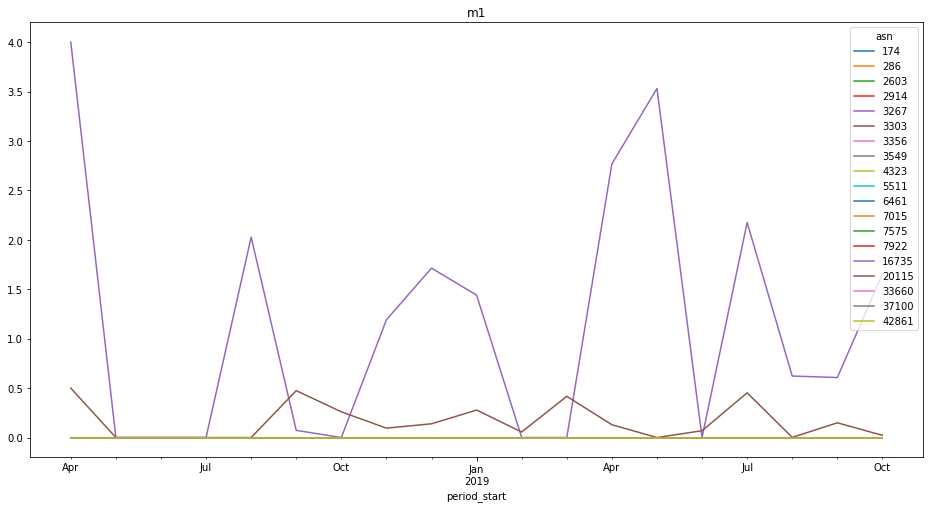

<Figure size 432x288 with 0 Axes>

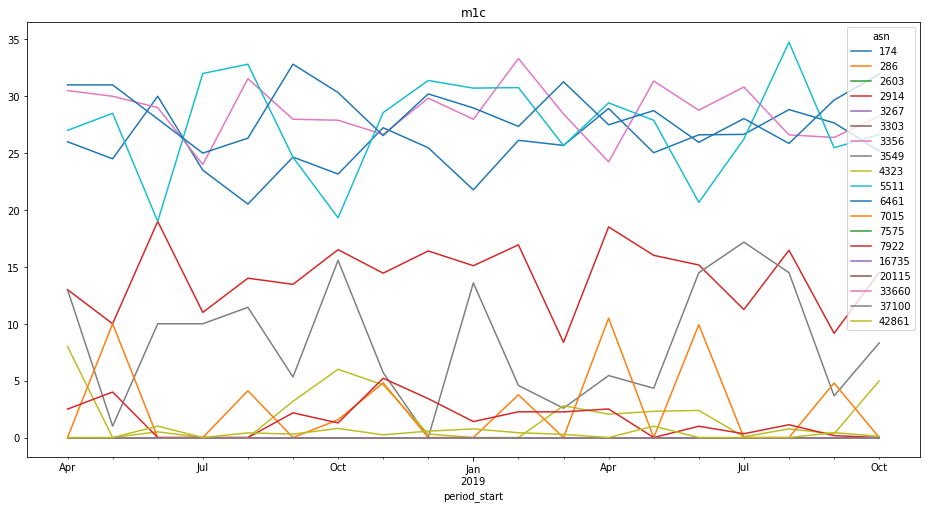

<Figure size 432x288 with 0 Axes>

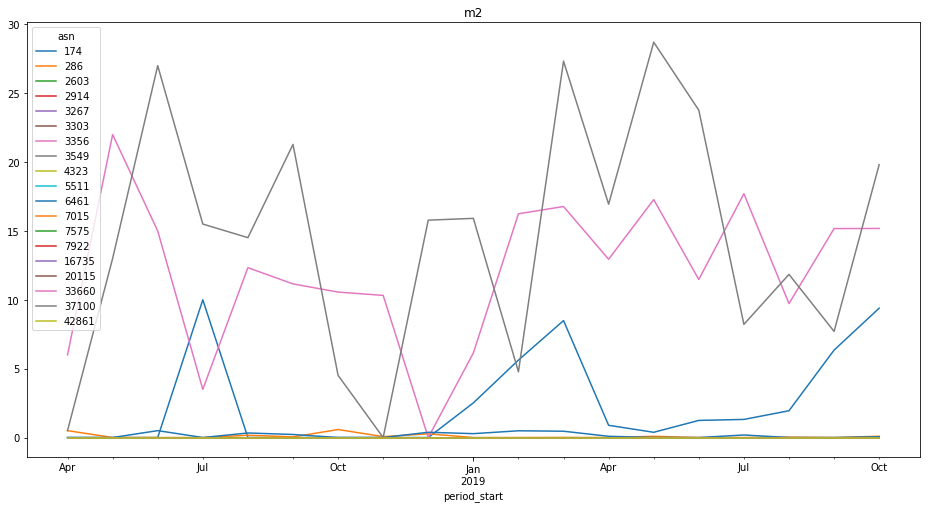

<Figure size 432x288 with 0 Axes>

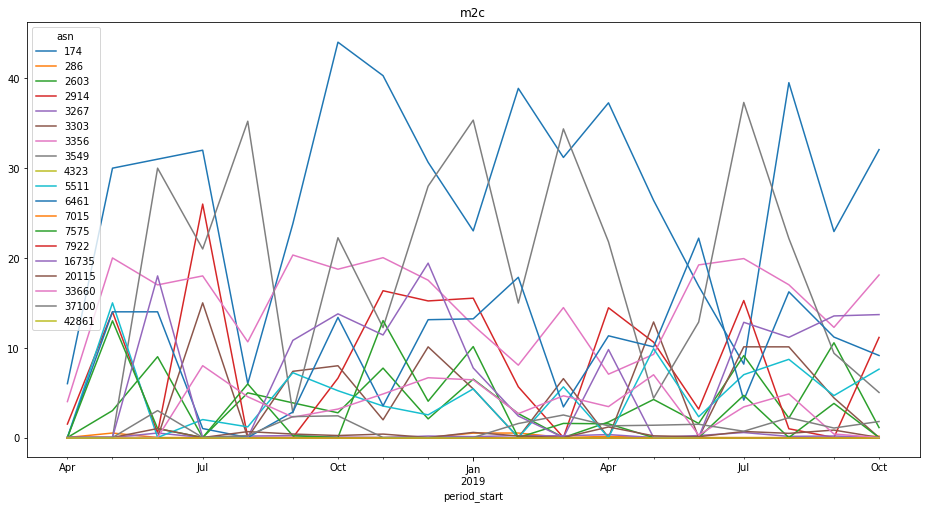

<Figure size 432x288 with 0 Axes>

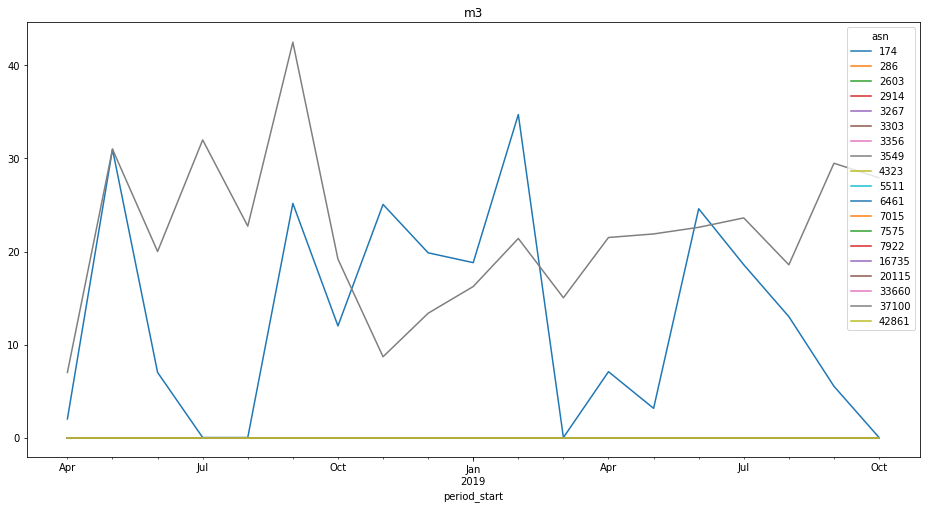

<Figure size 432x288 with 0 Axes>

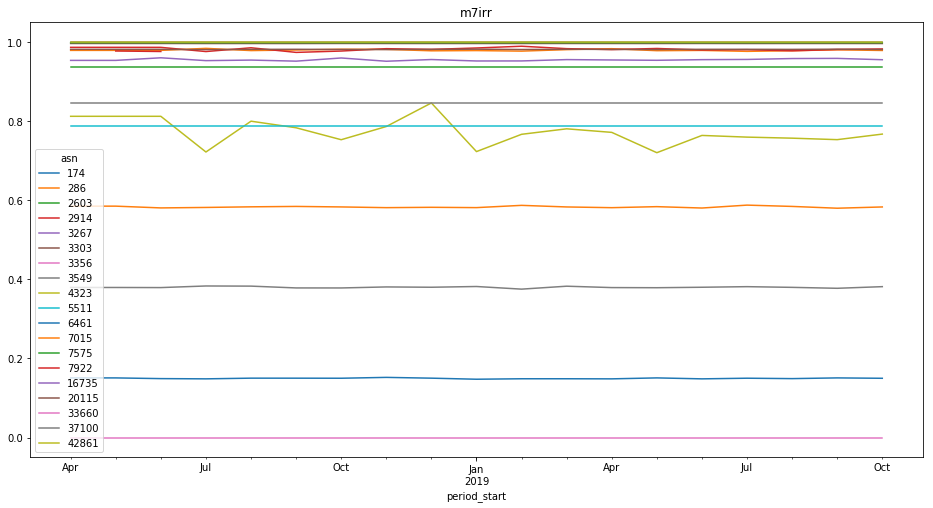

In [6]:
for metric in "m1", "m1c", "m2", "m2c", "m3", "m7irr":
    make_plot(metric, naughty_asns)